<a href="https://colab.research.google.com/github/Marquezdan/Trabalho_3_ML/blob/main/Adam_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [1/5] - Loss: 1.2461, Grad: 0.5212
Epoch [2/5] - Loss: 1.0357, Grad: 0.4081
Epoch [3/5] - Loss: 0.9108, Grad: 0.3229
Epoch [4/5] - Loss: 0.8345, Grad: 0.2601
Epoch [5/5] - Loss: 0.7867, Grad: 0.2119


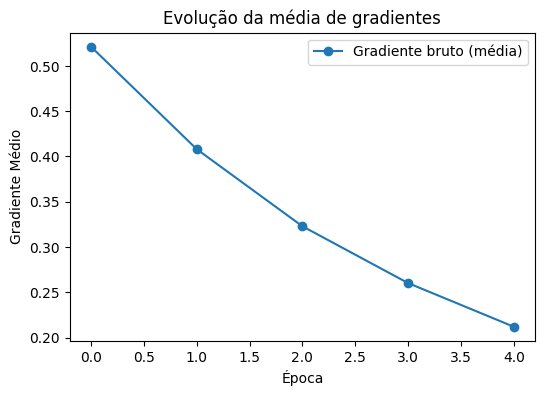

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Simulando dados aleatórios (100 amostras, 10 features, 1 saída)
X = torch.randn(100, 10)
y = torch.randn(100, 1)

# Modelo simples (Linear)
model = nn.Linear(10, 1)

# Critério de perda e otimizador (SGD básico para ficar claro)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

grad_history = []
epochs = 5

# Loop de treino curto (5 épocas)
for epoch in range(epochs):
    # Forward
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward
    optimizer.zero_grad()
    loss.backward()

    # Capturando a média de gradientes de todos os parâmetros
    total_grad = 0
    count = 0
    for param in model.parameters():
        if param.grad is not None:
            total_grad += param.grad.abs().mean().item()
            count += 1
    grad_history.append(total_grad / count if count > 0 else 0)

    # Atualiza parâmetros
    optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss.item():.4f}, Grad: {grad_history[-1]:.4f}")

# Plotando gradientes
plt.figure(figsize=(6,4))
plt.plot(grad_history, marker='o', label="Gradiente bruto (média)")
plt.xlabel("Época")
plt.ylabel("Gradiente Médio")
plt.title("Evolução da média de gradientes")
plt.legend()
plt.show()